### 6.5 Unsupervised Machine Learning - Clustering

####  Importing libraries and data
####  standadizing the data
####  The elbow technique
####  k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating Path
path = r'/Users/gwynreniers/Documents/Exercise 6.6'
path

'/Users/gwynreniers/Documents/Exercise 6.6'

In [4]:
df = pd.read_csv(os.path.join(path,'World Happiness Report Continents.csv'),
                      index_col = False)

In [5]:
df.shape

(52, 14)

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Total_views,Continent
0,15,15,2015,Brazil,16,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,111,South America
1,22,22,2015,Venezuela,23,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,353,South America
2,26,26,2015,Chile,27,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,121,South America
3,29,29,2015,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,138,South America
4,31,31,2015,Uruguay,32,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,151,South America


In [36]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0.1','Unnamed: 0', 'Total_views',],axis = 1)

KeyError: "['Unnamed: 0.1', 'Unnamed: 0', 'Total_views'] not found in axis"

In [37]:
df = df[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
         'Trust (Government Corruption)', 'Generosity']]

In [43]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.145740
1,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.058410
2,6.670,1.107150,1.124470,0.858570,0.441320,0.128690,0.333630
3,6.574,1.053510,1.248230,0.787230,0.449740,0.084840,0.114510
4,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400
5,6.477,0.918610,1.240180,0.690770,0.534660,0.051200,0.184010
6,6.269,0.995340,0.972000,0.608200,0.596570,0.136330,0.169910
7,5.975,0.864020,0.999030,0.790750,0.485740,0.180900,0.115410
8,5.890,0.681330,0.978410,0.539200,0.574140,0.088000,0.205360
9,5.878,0.759850,1.304770,0.660980,0.538990,0.082420,0.342400


In [38]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[ 1.74899635 -0.14024471 -0.04590304  0.27464543  0.13309962  1.65307919
  -0.0973512 ]
 [ 1.3908852   0.33928642  0.06501356  0.52752337 -0.40471985  0.34266766
  -1.32919045]
 [ 1.10108428  0.81813251 -0.56662021  2.01304673 -0.29752378  0.70825054
   2.55294397]
 [ 0.90236365  0.409846    0.02788124  1.24537388 -0.2237827  -0.18234999
  -0.53786808]
 [ 0.71813306  0.47188058 -0.16104687  1.50761368  1.123875    3.08230517
   1.12503732]
 [ 0.701573   -0.61695955 -0.01078826  0.20739066  0.51993378 -0.86558378
   0.44246889]
 [ 0.27101163 -0.03292108 -1.29903486 -0.68112556  1.06213217  0.86342016
   0.24358038]
 [-0.33757031 -1.03247708 -1.16919182  1.28325177  0.09149984  1.76864401
  -0.52517307]
 [-0.51352087 -2.42304125 -1.26824337 -1.42361823  0.86569363 -0.11816988
   0.74362277]
 [-0.53836095 -1.82537801  0.2994804  -0.11317248  0.55785526 -0.23150057
   2.6766498 ]
 [-0.65014131 -0.75716532 -1.28659337  0.63136473 -0.52838067 -0.68908848
  -0.03980048]
 [ 1.68482614  0.6688

In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-16.80104811278736,
 -7.647481027498783,
 -5.127882652744853,
 -4.050842336982438,
 -3.017017420953237,
 -2.7493676976714654,
 -2.398943414698508,
 -2.213054316383239,
 -2.0075132104561253]

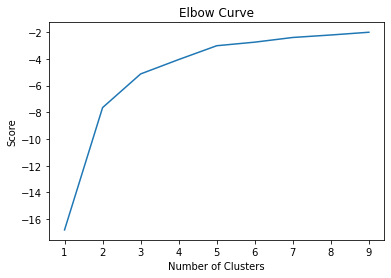

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [42]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [20]:

# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [21]:
df['clusters'] = kmeans.fit_predict(df)

/var/folders/sr/4vbhyt1x1nxfjqq_tpssnnzc0000gn/T/ipykernel_8407/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [22]:

df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,1
1,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,1
2,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,1
3,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,1
4,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,1


In [23]:
df['clusters'].value_counts()

1    28
0    21
2     3
Name: clusters, dtype: int64

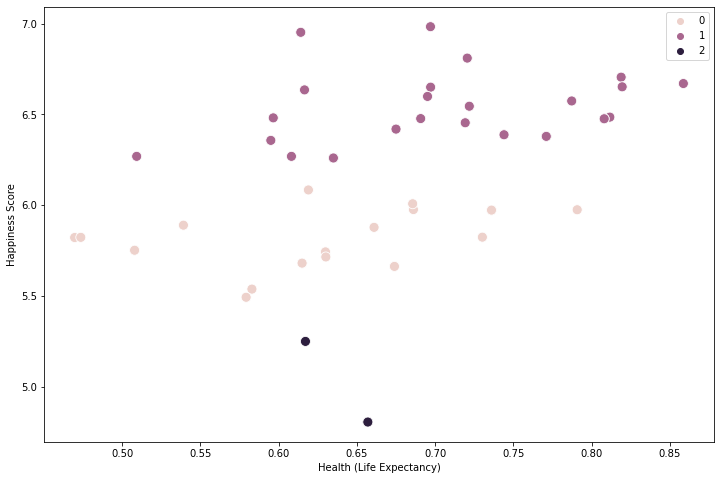

In [27]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Health (Life Expectancy)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

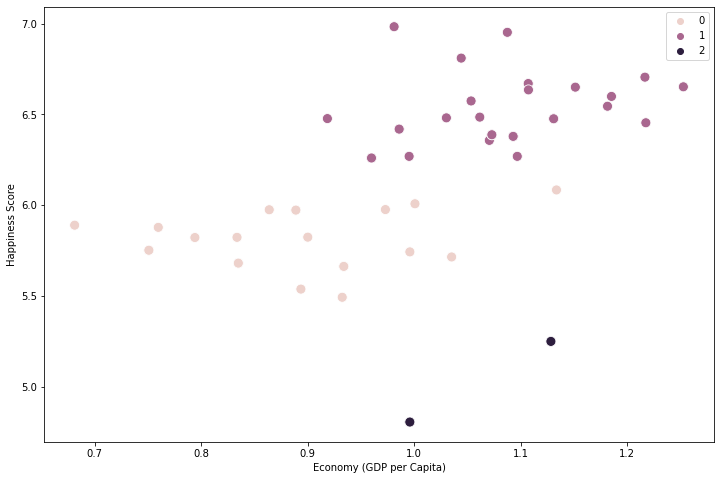

In [30]:
# Plot the clusters for the "happiness_score" and "economy_GDP_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Economy (GDP per Capita)') 
plt.ylabel('Happiness Score') 
plt.show()

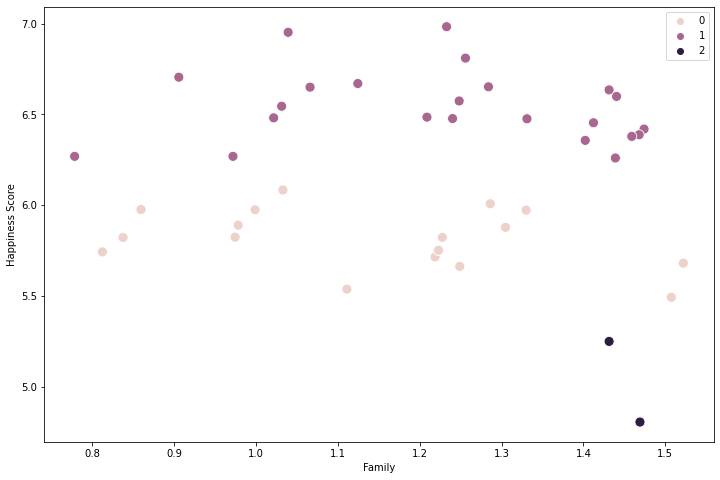

In [31]:
# Plot the clusters for the "happiness_score" and "family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Family'], y=df['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Family') 
plt.ylabel('Happiness Score') 
plt.show()

In [35]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Economy (GDP per Capita)':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Trust (Government Corruption)':['mean', 'median'],
                          'Generosity':['mean', 'median']})

Happiness Score         Economy (GDP per Capita)           \
                       mean  median                     mean   median   
cluster                                                                 
dark purple        4.954000  4.8060                 1.040144  0.99600   
pink               5.805095  5.8220                 0.886497  0.88900   
purple             6.514679  6.4765                 1.080204  1.08027   

               Family           Health (Life Expectancy)             Freedom  \
                 mean    median                     mean    median      mean   
cluster                                                                        
dark purple  1.456446  1.469000                 0.643715  0.657000  0.139999   
pink         1.180898  1.223000                 0.625883  0.629940  0.493592   
purple       1.265641  1.307512                 0.708684  0.708163  0.497492   

                   Trust (Government Corruption)        Generosity            
            median                          mean median       mean    median  
cluster                                                                       
dark purple  0.133                      0.056164  0.052   0.059007  0.056000  
pink         0.530                      0.084842  0.074   0.157909  0.145270  
purple       0.493                      0.104585  0.088   0.158724  0.152637